In [1]:
import numpy as np
import h5py # You may need to install this in your python environment
import matplotlib.pyplot as plt

In [2]:
# First, download the rgc_data from the website and save it in the same folder as this notebook
# Then run import the data
fpath = 'rgc_data.h5'
df = h5py.File(fpath, 'r')

['spike_times', 'stimulus', 'time']

In [ ]:
# Let's take a look at what data is in the file
list(df.keys())

In [3]:
# Save the data to numpy arrays
spike_times = np.array(df['spike_times'])
stimulus = np.array(df['stimulus'])
time = np.array(df['time'])

In [4]:
dt = 0.01

# Initialize the STE
# compute the dimensions of the filter (spatial and temporal)
spatial_dim = stimulus.shape[1] # the number of spatial dimensions in the stimulus
filter_length = 40 # the number of temporal dimensions in the stimulus

In [5]:
# cut out the first few spikes that occur before the length of the filter (in seconds) has elapsed
spike_times = spike_times[np.where(spike_times > filter_length*dt)[0]]

In [6]:
# store the indices of the time array corresponding to each spike
# (you'll use this when computing histograms and the nonlinearity of the LN model)
spike_indices = np.zeros(len(spike_times))
time_indices_of_spikes = np.zeros(len(spike_times))

# Q1.2
STES = # Your code here

# Q1.3 Collect stimuli that are part of the STE
select out the stimulus preceeding the spike, and store it in the `ste` array
for i, st in enumerate(spike_times):
    
    # Your code here. Hints:
    # - Get the nearest index of this spike time
    # - Then select out the stimulus preceeding the spike, and store it in the `ste` array
    
    STES[i] = # The results of your slicing and reshaping

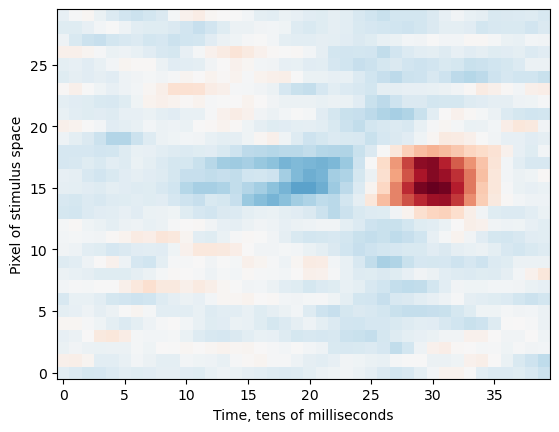

In [7]:
# Q1.4

# Compute the spike-triggered average (STA)
# by averaging over the number of spikes in the STE

# Take the mean of the STE data in the correct axis
STA_vector = # Your code here

# Normalize the vector such that is has a unit norm
STA_vector_normalized = # Your code here

# Reshape the data for plotting, think about the
STA = # Your code here

# For plotting: this colormap and values work well, but you can use whichever you want
vmin = np.min(STA_vector_normalized)
vmax = 2 * np.max(STA_vector_normalized)
colormap = 'RdBu_r'

plt.figure()
plt.imshow(/*Your code here*/, origin='lower', cmap=colormap, vmin = vmin, vmax = vmax)

# Depending on how you plotted the data, you may have to switch the x and y labels
plt.xlabel("Time before spike, tens of milliseconds")
plt.ylabel("Pixel of stimulus space")
plt.show()

In [8]:
# Spike-triggered covariance
ste_cov = np.cov(STES, rowvar = False)
ste_cov.shape

# Eigenvectors
eigenvals, eigenvecs = np.linalg.eig(ste_cov)

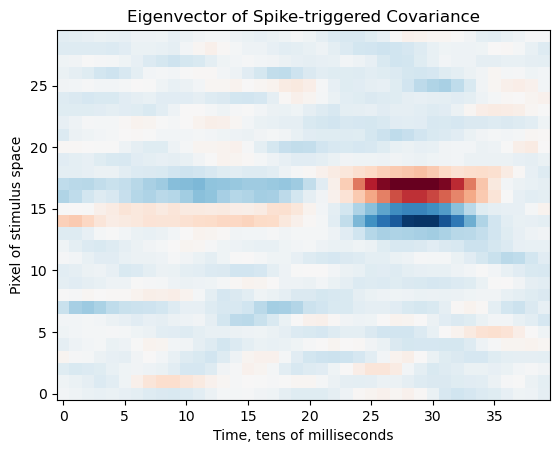

In [11]:
# Your code here, an example of one eigenvector below
eig_index = 0
eigen_stc_to_plot = np.reshape(eigenvecs[:, eig_index], (filter_length, spatial_dim))

plt.figure()
plt.imshow(np.transpose(eigen_stc_to_plot), origin='lower', cmap = colormap, vmin = vmin, vmax = vmax)

plt.xlabel("Time before spike, tens of milliseconds")
plt.ylabel("Pixel of stimulus space")
plt.title("First Eigenvector of Spike-triggered Covariance")
plt.show()

In [1]:
# Your code here for E-H

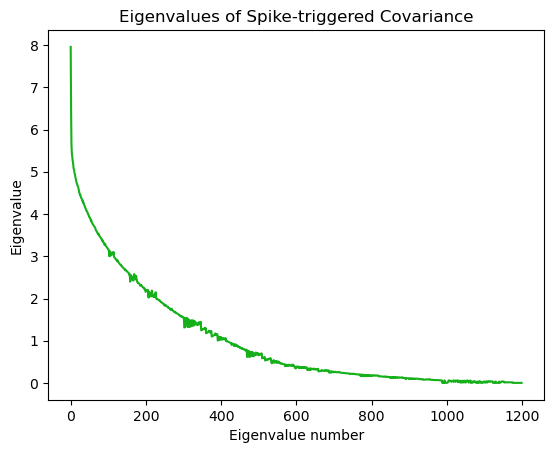

In [14]:
plt.figure()
plt.plot(eigenvals, '-', markersize = 3, color = "xkcd:green")

#plt.xlabel(/*Your code here*/)
#plt.ylabel(/*Your code here*/)
plt.title("Eigenspectrum of covariance matrix")

plt.show()

In [ ]:
# Linear non-linear analysis
# This is functioning example code, look through and adjust as necessary

In [20]:
def custom_histogram(x, nbins):
    
    edges = np.linspace(min(x), max(x), nbins+1)
    n, edges = np.histogram(x, edges)
    
    inds = np.digitize(x, edges[0:-1])-1
    
    return n, edges, inds

In [21]:
# LN modeling
u = np.zeros((len(time)))

for t in range(filter_length, len(time)):
    
    stimulus_slice = stimulus[t-filter_length:t, :]
    stim_slice_flat = np.reshape(stimulus_slice, (1, filter_length*spatial_dim))
    u[t] = np.dot(stim_slice_flat, STA_flat)

In [22]:
n, edges, bin_indices = custom_histogram(u, 50)
spike_counts = np.histogram(spike_times, np.append(time, [time[-1]+dt]))
ub = range(50)

nonlinearity = np.zeros((len(ub)))
bin_centers = edges[0:-1] + 0.5*np.diff(edges)

for bin_index in np.unique(bin_indices):
        
    # find the times where u is in bin_index
    inds_u_in_bin = np.where(bin_indices == bin_index)[0]
    mean_spike_count = np.mean(spike_counts[0][inds_u_in_bin])
    
    nonlinearity[bin_index] = mean_spike_count

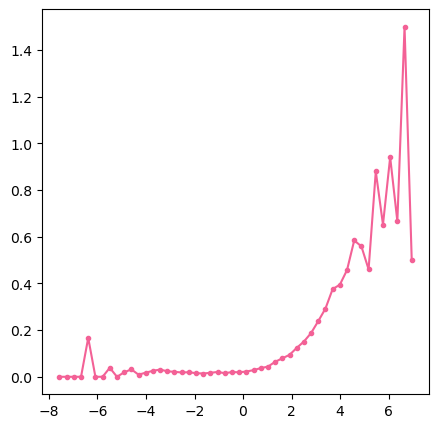

In [24]:
plt.figure(figsize = (5, 5))
plt.plot(bin_centers, nonlinearity, '-o', markersize = 3, color = 'xkcd:medium pink')

#plt.xlabel(/*Your code here*/)
#plt.ylabel(/*Your code here*/)
#plt.title(/*Your code here*/)
plt.show()